
<h1 style="text-align:center">   
      <font color = "#6B5B95" >
             Wykrywanie fałszywych wiadomości za pomocą  LSTM/GRU/CNN (NLP)
        </font>    
</h1>   
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">
<center><img style = "height:550px;" src="https://media.istockphoto.com/photos/fake-news-and-facts-digital-concept-picture-id1298158450?k=20&m=1298158450&s=612x612&w=0&h=_qTkB7uqWzu-2i9cpDf1aBFI8N8WlG0ICr2o-qGOLQo="></center>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

</br>


##Co to są fake newsy? 
<p>Fake newsy  odnoszą się do  dezinformacji lub fałszywych informacji, które są rozpowszechniane za pośrednictwem przekazu ustnego i tradycyjnych mediów, a ostatnio za pośrednictwem cyfrowych form komunikacji, takich jak  filmy, memy, niezweryfikowane reklamy i plotki rozpowszechniane w mediach społecznościowych. Fake newsy stał się poważnym problemem, wiele firm, rządów oraz instyucji wykorzystuję je do manipulacji róznymi grupami osób.  </p>



</br>

##Na temat wykorzystanej bazy
<p>
Ten zestaw danych składa się z 40000 fałszywych i prawdziwych wiadomości. Naszym celem jest wytrenowanie naszego modelu w celu dokładnego przewidywania, czy dana wiadomość jest prawdziwa czy fałszywa. Dane dotyczące fałszywych i prawdziwych wiadomości są podawane w dwóch oddzielnych zestawach danych, przy czym każdy zestaw danych składa się z około 20 000 artykułów. </p>
</br> 

##Co to jest NLP?
<p>NLP, czyli programowanie neurolingwistyczne, to synteza wiedzy z różnych dyscyplin naukowych, np. psychologii, psychoterapii, neurologii, lingwistyki, semantyki ogólnej, informatyki, teorii systemów itp. Większość definicji NLP podkreśla jego interdyscyplinarność i akcentuje, że stanowi wiedzę o strukturze subiektywnego doświadczenia człowieka. NLP uznaje się np. za zbiór zasad, narzędzi i modeli, które pomagają w uczeniu się, komunikacji i wprowadzaniu zmian.
NLP opisuje też sposób funkcjonowania umysłu oraz języka werbalnego i niewerbalnego, jako podstawowych mechanizmów formułowania i wyrażania myśli.
</br>

</br>
</br>
Link: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?datasetId=572515


</br>




<h1 style="text-align:center">   
      <font color = "#6B5B95" >
             Spis treści
        </font>    
</h1>   

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">


1. [Wykorzystane biblioteki](#1)
1. [Pobieranie i podgląd danych](#2)
1. [Analiza danych z pomocą wizualizacji](#3)
1. [Preprocessing](#4)
    * [Dane istotne](#5)
    * [Znaczyniki HTML](#6)
    * [Usuwanie znaków interpunkcyjnych i specjalnych](#7)
    * [Usunięcie stopwordsów](#8)
    * [Lematyzacja](#9)
    * [Preprocessing dla wszykich przykładów](#10)  

1. [Analiza nowych preprocesowanych danych z pomocą wizualizacji](#11)
    * [Word Clouds](#11)
    * [Liczba słów w każdym tekście](#11)
    * [Analiza N-Gram](#11)
1. [Przygotowywanie oraz analiza modeli](#12)
    * [Podział danych na testowe i treningowe](#13)
    * [Tokenizacja](#14)
    * [Modele](#15)
       * [CNN](#16)
       * [LSTM](#17)
       * [BILSTM](#18)
       * [GRU](#19)
       * [BIGRU](#20)
1. [Podsumowanie modeli](#21)
1. [Proces uczenia](#21)
1. [Analiza końcowa (Wnioski)](#22)
    * [Precyzja dla danych treningowych i testowych](#23)
    * [Wykresy accuracy/loss w każdej epoce](#23)
    * [Macierze pomyłek](#24)
    * [Raporty](#23)
    * [Testy na własnych przykładach](#25)
    * [Podsumowanie](#26)

<a id = 1></a>
<h1><font color = #6B5B95>1. Wykorzystane bibliotek</font></h1>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">




In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
import re
from wordcloud import WordCloud,STOPWORDS
import string 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.metrics import confusion_matrix
import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout, GRU, SimpleRNN, Bidirectional, Conv1D, MaxPool1D
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')
import os






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:

from bs4 import BeautifulSoup


<a id = 2></a>
<h1><font color = #6B5B95>2. Pobieranie i podgląd danych</font></h1>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

Dane są pobierane z podpiętego dysku Google. Link do danych można znaleźć na pierwszej stronie. Poniżej znajduję się ich tabelaryczna wizualizacja. Po pobraniu danych zostały one lekko zmodyfikowane, mianowicie datasety Ture.csv i Fake.csv zostały połączone oraz  dodana została kolumna <b>isFake</b> informująca czy dany artykuł jest fałszywy czy nie. </br> </br>

In [100]:
Real = pd.read_csv('/content/drive/MyDrive/AI_CSV/True.csv')
Fake = pd.read_csv('/content/drive/MyDrive/AI_CSV/Fake.csv')

In [101]:
Real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [102]:
Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [103]:
#Add column 
Real['isFake'] = 1
Fake['isFake'] = 0 

In [104]:
Real.head()

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [105]:
#Merge
data = pd.concat([Real, Fake], ignore_index=True, sort=False)
data.head()

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [106]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
isFake     0
dtype: int64

<a id = 3></a>
<h1><font color = #6B5B95>3. Analiza danych z pomocą wizualizacji</font></h1>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">


Po mergu datasetów warto przeprowadzić wstępną analize danych. Pare prostych histogramów pozwala na sprawdzenie czy dane nadają się do trenowania/testowania sieci.</br>


<h3><font color = #6B5B95>Histogram dla kolumny isFake</font></h3>
Przedstawia stosunek artykyłów fałszywych do  prawdziwych. Podział wydaje się odpowiedni, brak dominacji jednej z opcji. 
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

0    23481
1    21417
Name: isFake, dtype: int64


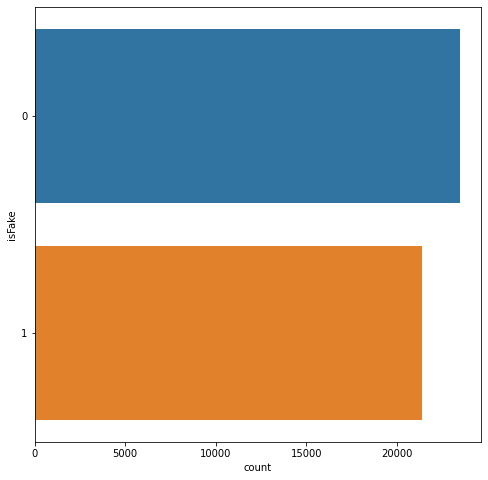

In [107]:
print(data["isFake"].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(y = 'isFake', data = data)

<h3><font color = #6B5B95>Histogram  dla komumny temat</font></h3>
Przedstawia stosunek ilościowy tematów występujcych w analizowanej bazie. 
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


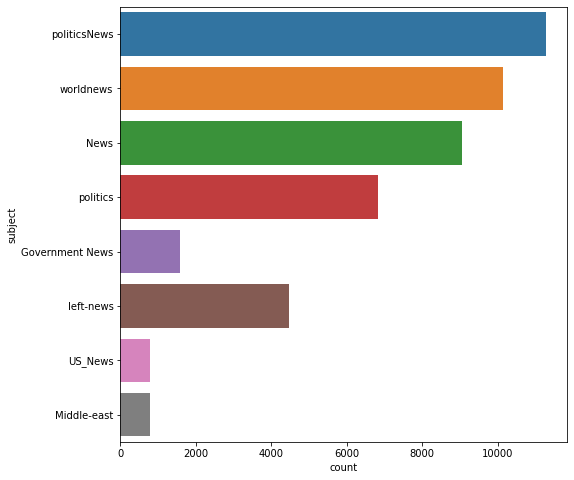

In [108]:
print(data.subject.value_counts())
plt.figure(figsize=(8,8))
sns.countplot(y = 'subject', data = data)

<a id = 4></a>
<h1><font color = #6B5B95>4. Preprocessing</font></h1>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

<p>Preprocessing w uczeniu maszynowym odnosi się do techniki przygotowywania (czyszczenia i organizowania)  danych, aby były odpowiednie do budowania i trenowania modeli. Poniżej przedstawiono cały proces preprocessingu dla pojedyńczego artykułu - zmienna <b>first</b>.</p>

<a id = 5></a>
<h2><font color = #6B5B95>Dane istotne</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">
Wprowadzenie istotnych danych do pojedyńczej kolumny, na której później będzie uczony model. Dane jakie zostały wybrane, to treść artykułu, tytuł oraz temat. Odrzucone zostały takie informacje jak id oraz data  powstania artykułu, gdyż nie ma ona znaczenia w procesie oceny prawdziwości danego artykułu.

In [109]:
# important columns for learning
data['text']= data['subject'] + " " + data['title'] + " " + data['text']
del data['title']
del data['subject']
del data['date']
data.head()

,text,isFake
0,"politicsNews As U.S. budget fight looms, Repub...",1
1,politicsNews U.S. military to accept transgend...,1
2,politicsNews Senior U.S. Republican senator: '...,1
3,politicsNews FBI Russia probe helped by Austra...,1
4,politicsNews Trump wants Postal Service to cha...,1


In [110]:
first = data.text[10]
first

'politicsNews Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. M

<a id = 6></a>
<h2><font color = #6B5B95>Znaczyniki HTML</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">
Usuwanie treści HTML z pomocą biblioteki <b>BeautifulSoup</b>.

In [111]:


soup = BeautifulSoup(first, "html.parser")
first = soup.get_text()
first

'politicsNews Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. M

<a id = 5></a>
<h2><font color = #6B5B95>Usuwanie znaków interpunkcyjnych i specjalnych</font></h2>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

1. Usunięto znaki specjalne
1. Zastąpiono znaki spoza alfabetu spacjami
1. Zmiana małych liter na duze 


In [112]:
first = re.sub('\[[^]]*\]', ' ', first)
first = re.sub('[^a-zA-Z]',' ',first)  # replaces non-alphabets with spaces
first = first.lower() # Converting from uppercase to lowercase
first

'politicsnews jones certified u s  senate winner despite moore challenge  reuters    alabama officials on thursday certified democrat doug jones the winner of the state s u s  senate race  after a state judge denied a challenge by republican roy moore  whose campaign was derailed by accusations of sexual misconduct with teenage girls  jones won the vacant seat by about        votes  or     percentage points  election officials said  that made him the first democrat in a quarter of a century to win a senate seat in alabama   the seat was previously held by republican jeff sessions  who was tapped by u s  president donald trump as attorney general  a state canvassing board composed of alabama secretary of state john merrill  governor kay ivey and attorney general steve marshall certified the election results  seating jones will narrow the republican majority in the senate to    of     seats  in a statement  jones called his victory  a new chapter  and pledged to work with both parties  m

<a id = 8></a>
<h2><font color = #6B5B95>Usunięcie stopwordsów</font></h2>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">


Usuwanie stopwordsów jest jednym z najczęściej stosowanych etapów preprocessingu w  aplikacjach NLP. 

#### Czym są stopwordsy?

Są to właściwie najpopularniejsze słowa w każdym języku (takie jak rodzajniki, przyimki, zaimki, spójniki itp.) i nie wnoszą zbyt wiele informacji do kontekstu. Przykładami kilku stopwordsów w języku angielskim są „the”, „a”, „an”, „so”, „what”.

#### Dlaczego usuwamy stopwordsy?

Usuwamy  nieistotne słowa z tekstu, aby skupić się na ważnych informacjach. Wyrzucenie  takich danych z tekstu nie wpływa niegatywnie na uczenie się naszego modelu. Za to zmniejsza się  rozmiar zestawu danych, a tym samym skraca czas uczenia ze względu na mniejszą liczbę tokenów zaangażowanych w uczenie.
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">


In [113]:
nltk.download("stopwords")   
nltk.download('punkt')

from nltk.corpus import stopwords  

# we can use tokenizer instead of split
first = nltk.word_tokenize(first)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [114]:
first = [ word for word in first if not word in set(stopwords.words("english"))]

<a id = 9></a>
<h2><font color = #6B5B95>Lematyzacja</font></h2>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

Lematyzacja - to sprowadzenie słowa do jego podstawowej postaci. W przypadku czasownika będzie do bezokolicznik, w przypadku rzeczownika – mianownik liczby pojedynczej. Do wykonania tego zadania potrzebny jest słownik lub rozbudowany zestaw reguł fleksyjnych dla danego języka. Reasumująć 
lematyzacja ma na celu przywrócenia wielu form tego samego słowa do ich pierwotnej formy , np.'coming', 'comes' zmieni w  'come'

In [115]:
import nltk
nltk.download('wordnet')
#Lemmatization to bring back multiple forms of same word to their common root like 'coming', 'comes' into 'come'.


lemma = nltk.WordNetLemmatizer()
first = [ lemma.lemmatize(word) for word in first] 

first = " ".join(first)
first

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'politicsnews jones certified u senate winner despite moore challenge reuters alabama official thursday certified democrat doug jones winner state u senate race state judge denied challenge republican roy moore whose campaign derailed accusation sexual misconduct teenage girl jones vacant seat vote percentage point election official said made first democrat quarter century win senate seat alabama seat previously held republican jeff session tapped u president donald trump attorney general state canvassing board composed alabama secretary state john merrill governor kay ivey attorney general steve marshall certified election result seating jones narrow republican majority senate seat statement jones called victory new chapter pledged work party moore declined concede defeat even trump urged stood claim fraudulent election statement released certification said regret medium outlet reported alabama judge denied moore request block certification result dec election decision shortly canvass

<a id = 10></a>
<h2><font color = #6B5B95>Preprocessing dla wszykich przykładów</font></h2>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">
Przetworzenie  całej kolumny danych wcześniej przedstawionymi sposobami.  Jako że zbiór danych jest dość dużych może zająć to dłuższą chwilę. Każdy etap został wyekstrahowany do funkcji, aby zwiększyć czytelność oraz uniknąć redundancji.  

In [116]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

#Total function
def preprocess(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

#Apply function on text column
data['text']=data['text'].apply(preprocess)

In [117]:
data.head()

,text,isFake
0,politicsnews u budget fight loom republican fl...,1
1,politicsnews u military accept transgender rec...,1
2,politicsnews senior u republican senator let m...,1
3,politicsnews fbi russia probe helped australia...,1
4,politicsnews trump want postal service charge ...,1


<a id = 11></a>
<h1><font color = #6B5B95>5. Analiza nowych preprocesowanych danych z pomocą wizualizacji</font></h1>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

<a id = 10></a>
<h2><font color = #6B5B95>Word Clouds</font></h2>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

### Czym są chmury słów (Word Clouds)?
Chmura słów to zbiór słów przedstawionych w różnych rozmiarach. Im większe i słowo tym częściej pojawią się w zbiorze.  Chmury słów to potężny sposób na wizualizację. Są łatwe do odczytania, szybkie w przygotowaniu i łatwe do zrozumienia.


<h3><font color = #6B5B95>Word Clouds dla fałszywych artykułów</font></h3>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

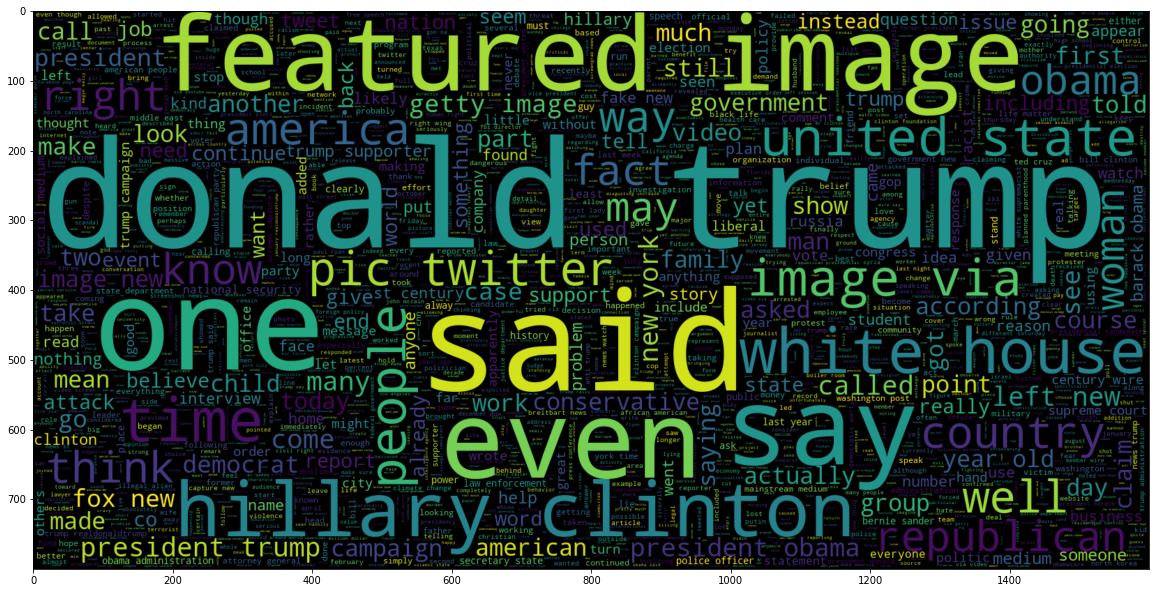

In [118]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words= 2000, width= 1600, height= 800, stopwords= STOPWORDS).generate(" ".join(data[data.isFake == 0].text))
plt.imshow(wc, interpolation= 'bilinear')


<h3><font color = #6B5B95>Word Clouds dla prawdziwych artykułów</font></h3>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

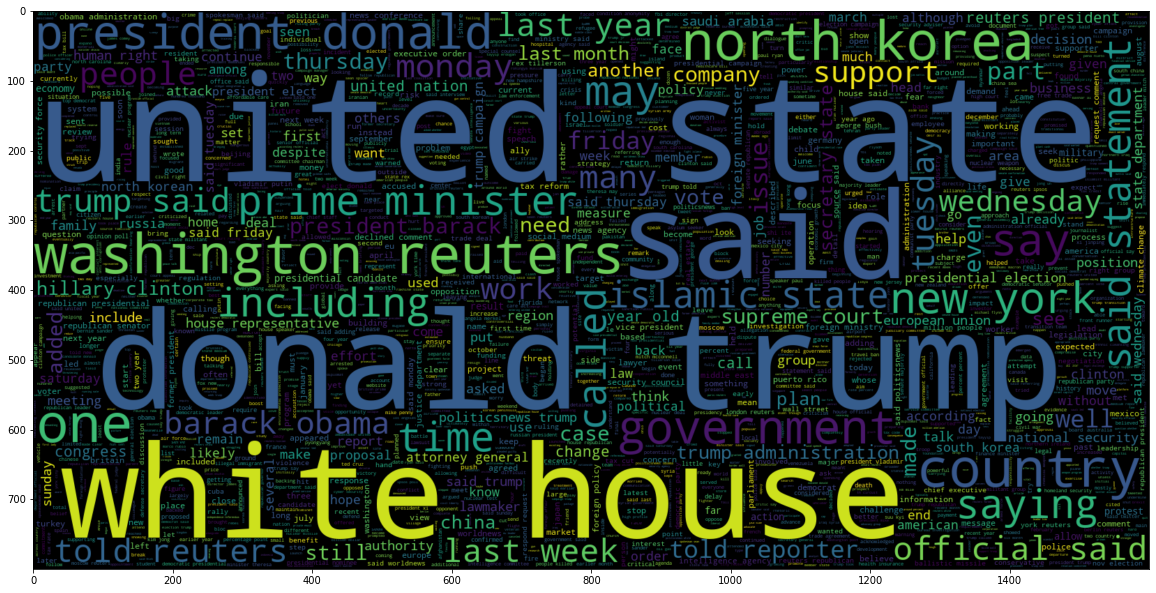

In [119]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words= 2000, width= 1600, height= 800, stopwords= STOPWORDS).generate(" ".join(data[data.isFake == 1].text))
plt.imshow(wc, interpolation= 'bilinear')

<a id = 10></a>
<h2><font color = #6B5B95>Liczba słów w każdym tekście</font></h2>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

Histogram od ilości słów w teksćie ukazuje nam  że liczba słów jest nieco inna dla prawdziwych i fałszych artykułów, 500 słów jest najczęściej spotykanych w  prawdziwych artykułach, a około 250 słów w fałszywych.




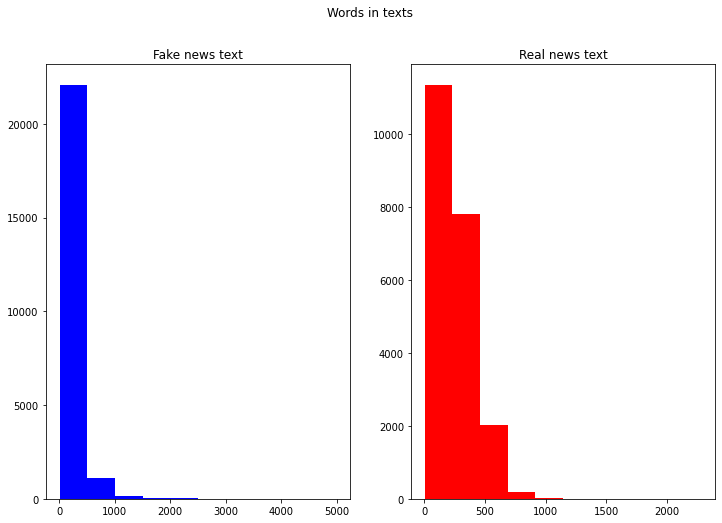

In [120]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['isFake']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='blue')
ax1.set_title('Fake news text')
text_len=data[data['isFake']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

In [121]:
texts = ' '.join(data['text'])

In [122]:
string = texts.split(" ")

In [123]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

<a id = 10></a>
<h2><font color = #6B5B95>N-gram</font></h2>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

N-gram oznacza sekwencję n-słów, symboli lub tokenów. Technicznie można je zdefiniować jako sąsiadujące sekwencje pozycji w dokumencie. Przykładowo bigramem jest "Gracz Gothica", a sformułowanie "Gomez nie wiedział" to trigram. W tym projekcie n-gramy zostały wykorzystane podczas generowania wykresów popularności słów w wykorzystanej bazie na której badany był model. Na przestrzeni najczęstszych występowań zarówno wśród unigramów, bigramów czy trigramów pojawiło się słowo Trump, które sąsiadowało najczęściej ze słowem Donald, oraz Prezydent.


<h3><font color = #6B5B95>Analiza Unigram</font></h3>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

           word   count
0      (trump,)  149603
1       (said,)  133030
2          (u,)   78516
3      (state,)   62726
4  (president,)   58790


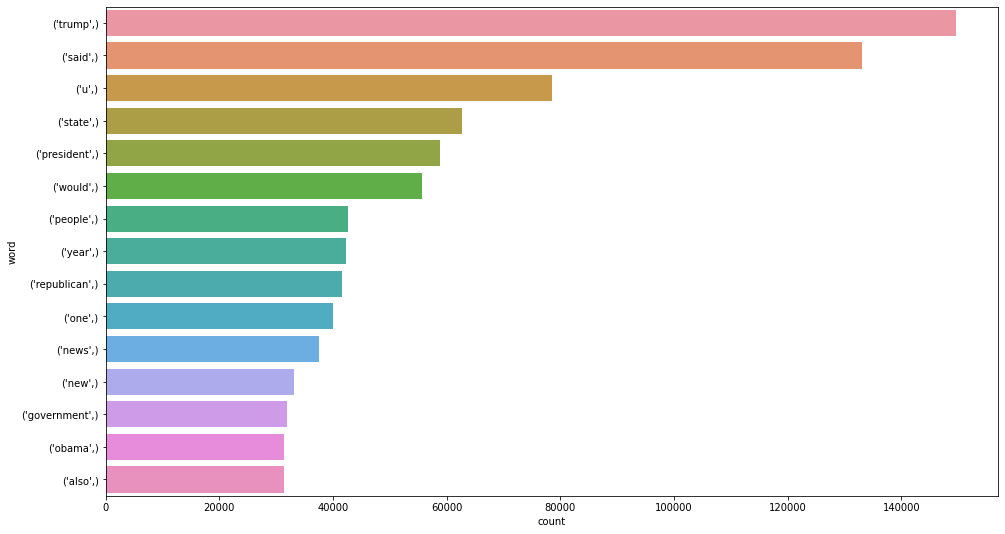

In [124]:
draw_n_gram(string,1)

<h3><font color = #6B5B95>Analiza Bigram</font></h3>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

                 word  count
0     (donald, trump)  25203
1     (united, state)  18943
2      (white, house)  16296
3  (hillary, clinton)  10217
4         (new, york)   9305


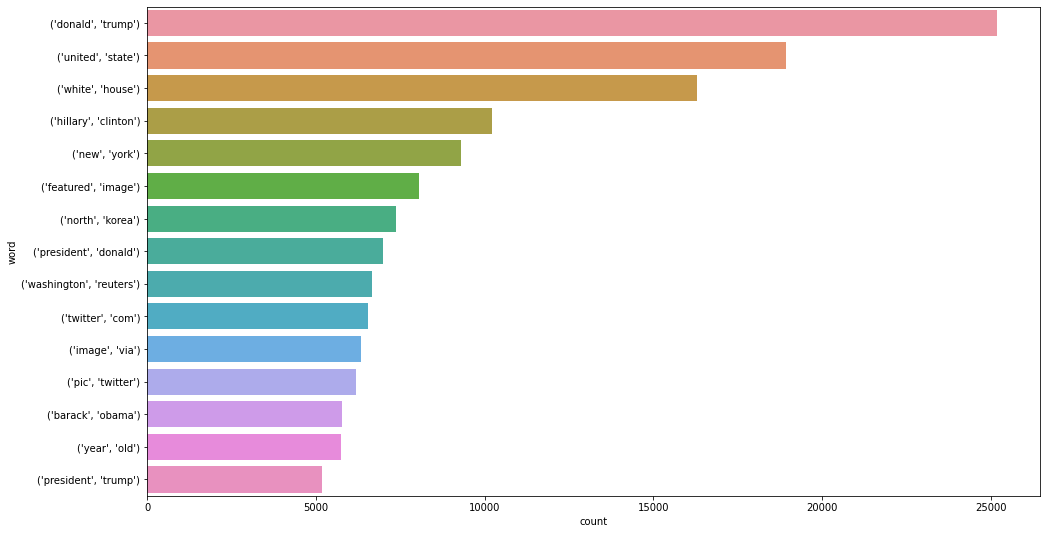

In [125]:
draw_n_gram(string,2)

<h3><font color = #6B5B95>Analiza Trigram</font></h3>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

                         word  count
0  (president, donald, trump)   6830
1         (pic, twitter, com)   6185
2      (featured, image, via)   6029
3  (president, barack, obama)   3911
4        (getty, image, news)   3575


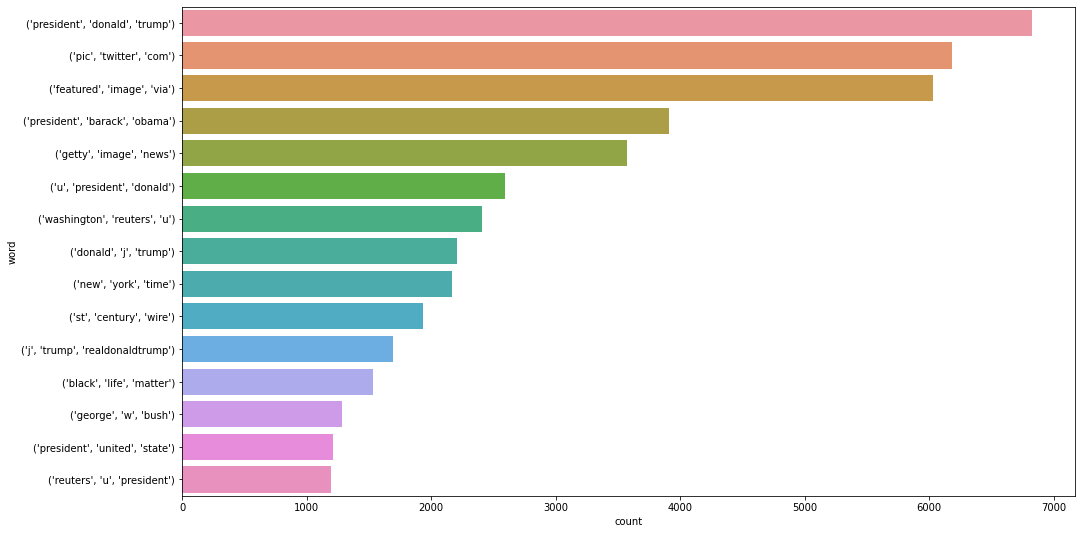

In [126]:
draw_n_gram(string,3)

<a id = 11></a>
<h1><font color = #6B5B95>6. Przygotowywanie oraz analiza modeli</font></h1>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

<a id = 5></a>
<h2><font color = #6B5B95>Podział danych na testowe i treningowe</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

Jako że dane które modelujemy nie są podzielone na zbiór testowy i treningowy, sami musimy dokonać takie podziału. Robimy to wykorzysyując funkcję train_test_split. Rozdiela ona zestaw danych na na dwa podzestawy, jeden do treningu, a drugi do testowania.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['isFake'], random_state=0)

<a id = 5></a>
<h2><font color = #6B5B95>Tokenizacja</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">


Zdania trzeba podzielić na tokeny. Token to, w przybliżeniu, słowo. Tokenizacja polega na podzieleniu tekstu na mniejsze jednostki zwane tokenami. Tokeny są różnymi rzeczami w zależności od typu tokenizatora, którego używasz. Token może być albo słowem, znakiem, lub pod-słowo (na przykład, w angielskim słowie "higher", istnieją 2 podsłowa: "high" oraz "er"). Znaki interpunkcyjne  takie jak  "!", ".", i ";", również mogą być tokenami. %} Tokenizacja jest podstawowym krokiem w każdej operacji przetwarzania języka naturalnego. Biorąc pod uwagę różnorodność istniejących struktur językowych struktur językowych, tokenizacja jest inna w każdym języku.

</br>

Jest wiele metod i bibliotek służących do tokenizacji tekstu. W tym projekcie wykorzystano metode <b>text.Tokenizer</b> z biblioteki keras, dlatego że idealnie nadaje się do długich tekstów, przykładowo <b>one_hot</b> z biblioteki tensorflow lepiej sprawdza się przy tokenizacji tekstów krótkich. 


In [128]:
max_features = 10000
maxlen = 300

In [129]:
# Tokenizing Text -> Repsesenting each word by a number

# Mapping of orginal word to number is preserved in word_index property of tokenizer

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [130]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

<a id = 5></a>
<h2><font color = #6B5B95>Modele</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

Model z biblioteki Keras reprezentuje rzeczywisty model sieci neuronowej. Keras udostępnia dwa tryby tworzenia modelu, proste i łatwe w użyciu Sequential API oraz bardziej elastyczne i zaawansowane Functional API. Wykorzystanie biblioteki kares bardzo ułatwia i przyspiesza budowanie modeli z przeróżnych sieci. Na potrzeby projektu stworzone zostało 5 różnych sieci w celu porówniania ich skuteczności. Sieci pod względem budowy są bardzo przybliżone (podobna konfiguracja dla każdej sieci)
</br>

###Opis wspólnych warstw

* Sequential - Model sekwencyjny jest odpowiedni dla zwykłego stosu warstw, w którym każda warstwa ma dokładnie jeden tensor wejściowy i jeden tensor wyjściowy.
* Embedding - Zamienia dodatnie liczby całkowite (indeksy) w gęste wektory o stałym rozmiarze.
* Dense (relu) - Tylko twoja zwykła, gęsto połączona warstwa NN. Jednym z argumentów jet funkcja aktywacji relu.
* Dense (sigmoid) - Ta sama warstwa jednak wykorzystująca funkcję aktywacji sigmoid

###Opis prywatnych warstw
* Conv1D - Warstwa splotu 1D. Ta warstwa tworzy jądro splotu, które jest splątane z danymi wejściowymi warstwy w pojedynczym wymiarze przestrzennym (lub czasowym), aby wytworzyć tensor danych wyjściowych.
* MaxPool1D - Maksymalna operacja łączenia danych dla danych czasowych 1D.
* LSTM - Wariant RNN, który jest zdolny do uczenia się długoterminowych zależności, zwłaszcza w problemach z przewidywaniem sekwencji.
* GRU - Jest to LSTM z bramką zapomnienia, ale ma mniej parametrów niż LSTM
* Bidirectional - Dwukierunkowy pakiet dla sieci RNN.




###Dlaczego wybrano taką strukturę modelu? 

Każy model w celu lepszej jakośći uczenia w każðym modelu występują 2 warstwy danej sieci. Skumulowanie warstw powoduje że uczenie jest stabilniejsze i wydajniejsze. 

dropout i recurrent_dropout - w celu uniknięcia overfittingu w  poszczegónych modelach.


 * dropout: liczba zmiennoprzecinkowa między 0 a 1. Ułamek jednostek do odrzucenia dla liniowej transformacji danych wejściowych.
 * recurrent_dropout: zmiennoprzecinkowa od 0 do 1. Ułamek jednostek, które mają zostać porzucone podczas liniowej transformacji stanu rekurencyjnego.

Do trenowania sieci użyto optymalizator Adam, który wykorzystuje
 zmieniający się learning rate, zmniejszany wraz ze wzrostem liczby iteracji uczenia modelu (epok). Optymalizator Adam wykorzystuje również algorytm Momentum,odpowiedzialny za unikanie minimów lokalnych podczas szukania globalnego minimum funkcji strat.


In [131]:
batch_size = 256
epochs = 10
embed_size = 100
#Load this embedding matrix into an Embedding layer. trainable=False to prevent the weights from being updated during training.



<a id = 5></a>
<h2><font color = #6B5B95>CNN - Convolutional Neural Network</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">



In [132]:
model_CONV = Sequential(name="CNN-Model")
model_CONV.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
model_CONV.add(Conv1D(activation='relu', filters=4, kernel_size=4))
model_CONV.add(MaxPool1D())
model_CONV.add(LSTM(units=128))
model_CONV.add(Dense(1, activation='sigmoid'))
model_CONV.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

<a id = 5></a>
<h2><font color = #6B5B95>LSTM - Long short-term memory</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">


In [133]:
model_LSTM = Sequential(name="LSTM-Model")
#Non-trainable embeddidng layer
model_LSTM.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#LSTM 
model_LSTM.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model_LSTM.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model_LSTM.add(Dense(units = 32 , activation = 'relu'))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])


<a id = 5></a>
<h2><font color = #6B5B95>Bidirectional LSTM - Bidirectional Long short-term memory</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

In [134]:
model_BILSTM = Sequential(name="Bidirectional-LSTM-Model")
#Non-trainable embeddidng layer
model_BILSTM.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#LSTM 
model_BILSTM.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
model_BILSTM.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1)))
model_BILSTM.add(Dense(units = 32 , activation = 'relu'))
model_BILSTM.add(Dense(1, activation='sigmoid'))
model_BILSTM.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

<a id = 5></a>
<h2><font color = #6B5B95>GRU - Gated Recurrent Unit </font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">


In [135]:
model_GRU = Sequential(name="GRU-Model")
#Non-trainable embeddidng layer
model_GRU.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#GRU 
model_GRU.add(GRU(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model_GRU.add(GRU(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model_GRU.add(Dense(units = 32 , activation = 'relu'))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

<a id = 5></a>
<h2><font color = #6B5B95>Bidirectional GRU - Bidirectional Gated Recurrent Unit</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

In [136]:
model_BIGRU = Sequential(name="Bidirectional-GRU-Model")
#Non-trainable embeddidng layer
model_BIGRU.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#GRU 
model_BIGRU.add(Bidirectional(GRU(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
model_BIGRU.add(Bidirectional(GRU(units=64 , recurrent_dropout = 0.1 , dropout = 0.1)))
model_BIGRU.add(Dense(units = 32 , activation = 'relu'))
model_BIGRU.add(Dense(1, activation='sigmoid'))
model_BIGRU.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

<a id = 11></a>
<h1><font color = #6B5B95>7. Podsumowanie modeli</font></h1>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">
Poniżej znajduje się dump wszyskich uwcześniej stworzonych modeli z pomocą metody <b>summary()</b>.

In [137]:
model_CONV.summary()

Model: "CNN-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 300, 100)          1000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 297, 4)            1604      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 148, 4)           0         
 1D)                                                             
                                                                 
 lstm_10 (LSTM)              (None, 128)               68096     
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,069,829
Trainable params: 69,829
Non-trainable params: 1,000,000
__________________________________________

In [138]:
model_LSTM.summary()

Model: "LSTM-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 300, 100)          1000000   
                                                                 
 lstm_11 (LSTM)              (None, 300, 128)          117248    
                                                                 
 lstm_12 (LSTM)              (None, 64)                49408     
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [139]:
model_BILSTM.summary()

Model: "Bidirectional-LSTM-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 300, 100)          1000000   
                                                                 
 bidirectional_8 (Bidirectio  (None, 300, 256)         234496    
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_21 (Dense)            (None, 32)                4128      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,403,009
Trainable params: 

In [140]:
model_GRU.summary()

Model: "GRU-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 300, 100)          1000000   
                                                                 
 gru_8 (GRU)                 (None, 300, 128)          88320     
                                                                 
 gru_9 (GRU)                 (None, 64)                37248     
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,127,681
Trainable params: 127,681
Non-trainable params: 1,000,000
_________________________________________________________________


In [141]:
model_BIGRU.summary()

Model: "Bidirectional-GRU-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 300, 100)          1000000   
                                                                 
 bidirectional_10 (Bidirecti  (None, 300, 256)         176640    
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              123648    
 onal)                                                           
                                                                 
 dense_25 (Dense)            (None, 32)                4128      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,304,449
Trainable params: 3

<a id = 11></a>
<h1><font color = #6B5B95>8. Proces uczenia</font></h1>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">
<h4>Podczas procesu uczenia się modeli można poglądnać ich accuracy oraz val_accuracy dla każdej z epok. Każde uczenie modelu zostało tak samo sparametryzowane, czyli :</h4>

* Idetyczne dane treningowe i targetowe
* Ten sam validation_split (30% danych posłuży do walidacji)
* Taki sam batch_size - jest to  liczba próbek podawanych jednocześnie,
 po czym następuje aktualizacja parametrów sieci, w naszym przypadku najlepiej sprawdził się batch_size na poziomie 256, uczenie było wtedy najstabilniejsze. 
* shuffle na True - określa czy "przetasować" dane treningowe przed każdą epoką

In [142]:
history_CONV = model_CONV.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/5
93/93 [==============================] - 4s 26ms/step - loss: 0.6464 - acc: 0.6312 - val_loss: 0.5086 - val_acc: 0.7772
Epoch 2/5
93/93 [==============================] - 2s 21ms/step - loss: 0.3864 - acc: 0.8362 - val_loss: 0.3604 - val_acc: 0.8541
Epoch 3/5
93/93 [==============================] - 2s 21ms/step - loss: 0.2979 - acc: 0.8841 - val_loss: 0.2634 - val_acc: 0.8998
Epoch 4/5
93/93 [==============================] - 2s 21ms/step - loss: 0.2494 - acc: 0.9076 - val_loss: 0.2537 - val_acc: 0.9061
Epoch 5/5
93/93 [==============================] - 2s 21ms/step - loss: 0.1784 - acc: 0.9357 - val_loss: 0.1678 - val_acc: 0.9397


In [143]:
history_LSTM = model_LSTM.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/5
93/93 [==============================] - 235s 2s/step - loss: 0.4641 - accuracy: 0.7610 - val_loss: 0.2961 - val_accuracy: 0.8708
Epoch 2/5
93/93 [==============================] - 226s 2s/step - loss: 0.3473 - accuracy: 0.8461 - val_loss: 0.3126 - val_accuracy: 0.8685
Epoch 3/5
93/93 [==============================] - 228s 2s/step - loss: 0.2711 - accuracy: 0.8907 - val_loss: 0.2248 - val_accuracy: 0.9175
Epoch 4/5
93/93 [==============================] - 229s 2s/step - loss: 0.2329 - accuracy: 0.9056 - val_loss: 0.2507 - val_accuracy: 0.8851
Epoch 5/5
93/93 [==============================] - 230s 2s/step - loss: 0.2174 - accuracy: 0.9132 - val_loss: 0.1826 - val_accuracy: 0.9261


In [148]:
history_BILSTM = model_BILSTM.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/5
93/93 [==============================] - 476s 5s/step - loss: 0.4570 - accuracy: 0.7760 - val_loss: 0.3693 - val_accuracy: 0.8645
Epoch 2/5
93/93 [==============================] - 477s 5s/step - loss: 0.3303 - accuracy: 0.8594 - val_loss: 0.3223 - val_accuracy: 0.8532
Epoch 3/5
93/93 [==============================] - 476s 5s/step - loss: 0.3095 - accuracy: 0.8625 - val_loss: 0.1889 - val_accuracy: 0.9307
Epoch 4/5
93/93 [==============================] - 481s 5s/step - loss: 0.1122 - accuracy: 0.9599 - val_loss: 0.0477 - val_accuracy: 0.9834
Epoch 5/5
93/93 [==============================] - 483s 5s/step - loss: 0.0501 - accuracy: 0.9818 - val_loss: 0.0434 - val_accuracy: 0.9850


In [144]:
history_GRU = model_GRU.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/5
93/93 [==============================] - 204s 2s/step - loss: 0.4684 - accuracy: 0.7760 - val_loss: 0.3926 - val_accuracy: 0.8169
Epoch 2/5
93/93 [==============================] - 205s 2s/step - loss: 0.2715 - accuracy: 0.8844 - val_loss: 0.1384 - val_accuracy: 0.9574
Epoch 3/5
93/93 [==============================] - 199s 2s/step - loss: 0.0625 - accuracy: 0.9764 - val_loss: 0.0374 - val_accuracy: 0.9863
Epoch 4/5
93/93 [==============================] - 201s 2s/step - loss: 0.0371 - accuracy: 0.9859 - val_loss: 0.0336 - val_accuracy: 0.9880
Epoch 5/5
93/93 [==============================] - 216s 2s/step - loss: 0.0276 - accuracy: 0.9890 - val_loss: 0.0267 - val_accuracy: 0.9898


In [145]:
history_BIGRU = model_BIGRU.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/5
93/93 [==============================] - 426s 4s/step - loss: 0.3806 - accuracy: 0.8185 - val_loss: 0.0896 - val_accuracy: 0.9670
Epoch 2/5
93/93 [==============================] - 425s 5s/step - loss: 0.0516 - accuracy: 0.9804 - val_loss: 0.0478 - val_accuracy: 0.9816
Epoch 3/5
93/93 [==============================] - 421s 5s/step - loss: 0.0386 - accuracy: 0.9850 - val_loss: 0.0382 - val_accuracy: 0.9852
Epoch 4/5
93/93 [==============================] - 417s 4s/step - loss: 0.0332 - accuracy: 0.9873 - val_loss: 0.0335 - val_accuracy: 0.9866
Epoch 5/5
93/93 [==============================] - 419s 5s/step - loss: 0.0320 - accuracy: 0.9874 - val_loss: 0.0334 - val_accuracy: 0.9874


<a id = 11></a>
<h1><font color = #6B5B95>9. Analiza końcowa (Wnioski)</font></h1>
<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

<a id = 5></a>
<h2><font color = #6B5B95>Precyzja dla danych treningowych i testowych</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

Wszyskie modele z wyjątkiem GRU oraz BIGRU posiadały odpowiednią skuteczność mieszczącą się w przedziale 80-90%. W przypadku GRU doszło do <b>overfittingu</b>,  dokładność wyniosła aż 99%. Jest to zbyt duża wartosć, prowadzi do tego że sieć idealnie radzi sobie z danymi z których się uczyła, niestety bardzo kiepsko idzie jej predykcja zewnętrznych danych. Poradzono sobię z tym problemem poprzez wyrzucenie jednej dodatkowej warswy GRU/BIGRU oraz zmniejszenie ilości epok do 3. Po takiej operacji dokładność mieściłą się już zakresie  80-90%. 

In [149]:

#The model.evaluate function predicts the output for 
#the given input and then computes the metrics function specified in the
#model.compile and based on y_true and y_pred and returns the computed metric value as the output.
print('\n \n \n')

print("(CONV) Accuracy  Training Data:- " , model_CONV.evaluate(X_train,y_train)[1]*100 , "%")
print("(CONV) Accuracy  Testing Data: - " , model_CONV.evaluate(X_test,y_test)[1]*100 , "%")
print('\n \n \n')
print("(LSTM) Accuracy  Training Data:- " , model_LSTM.evaluate(X_train,y_train)[1]*100 , "%")
print("(LSTM) Accuracy  Testing Data: - " , model_LSTM.evaluate(X_test,y_test)[1]*100 , "%")
print('\n \n \n')
print("(BILSTM) Accuracy  Training Data:- " , model_BILSTM.evaluate(X_train,y_train)[1]*100 , "%")
print("(BILSTM) Accuracy  Testing Data: - " , model_BILSTM.evaluate(X_test,y_test)[1]*100 , "%")
print('\n \n \n')
print("(GRU) Accuracy  Training Data:- " , model_GRU.evaluate(X_train,y_train)[1]*100 , "%")
print("(GRU) Accuracy  Testing Data: - " , model_GRU.evaluate(X_test,y_test)[1]*100 , "%")
print('\n \n \n')
print("(BIGRU) Accuracy  Training Data:- " , model_BIGRU.evaluate(X_train,y_train)[1]*100 , "%")
print("(BIGRU) Accuracy  Testing Data: - " , model_BIGRU.evaluate(X_test,y_test)[1]*100 , "%")


 
 

1053/1053 [==============================] - 6s 6ms/step - loss: 0.1536 - acc: 0.9446
(CONV) Accuracy  Training Data:-  94.45846676826477 %
351/351 [==============================] - 2s 6ms/step - loss: 0.1562 - acc: 0.9447
(CONV) Accuracy  Testing Data: -  94.46770548820496 %

 
 

1053/1053 [==============================] - 169s 160ms/step - loss: 0.1728 - accuracy: 0.9313
(LSTM) Accuracy  Training Data:-  93.12505722045898 %
351/351 [==============================] - 60s 170ms/step - loss: 0.1682 - accuracy: 0.9322
(LSTM) Accuracy  Testing Data: -  93.22049021720886 %

 
 

1053/1053 [==============================] - 317s 301ms/step - loss: 0.0376 - accuracy: 0.9863
(BILSTM) Accuracy  Training Data:-  98.6250102519989 %
351/351 [==============================] - 110s 313ms/step - loss: 0.0399 - accuracy: 0.9862
(BILSTM) Accuracy  Testing Data: -  98.61915111541748 %

 
 

1053/1053 [==============================] - 157s 149ms/step - loss: 0.0212 - accuracy: 0.9922
(GRU) Acc

<a id = 5></a>
<h2><font color = #6B5B95>Wykresy accuracy/loss w każdej epoce</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

Poniższe wykresy określają loss oraz accuracy dla danych treningowych i walidacyjnych.
 Dla każdego modelu dokładność zwiększa się co epokę, nie zaobserowano żadnych większych spadków. Loss nie jest zbyt wielki, w każdym modelu mieści się w normie. 
 

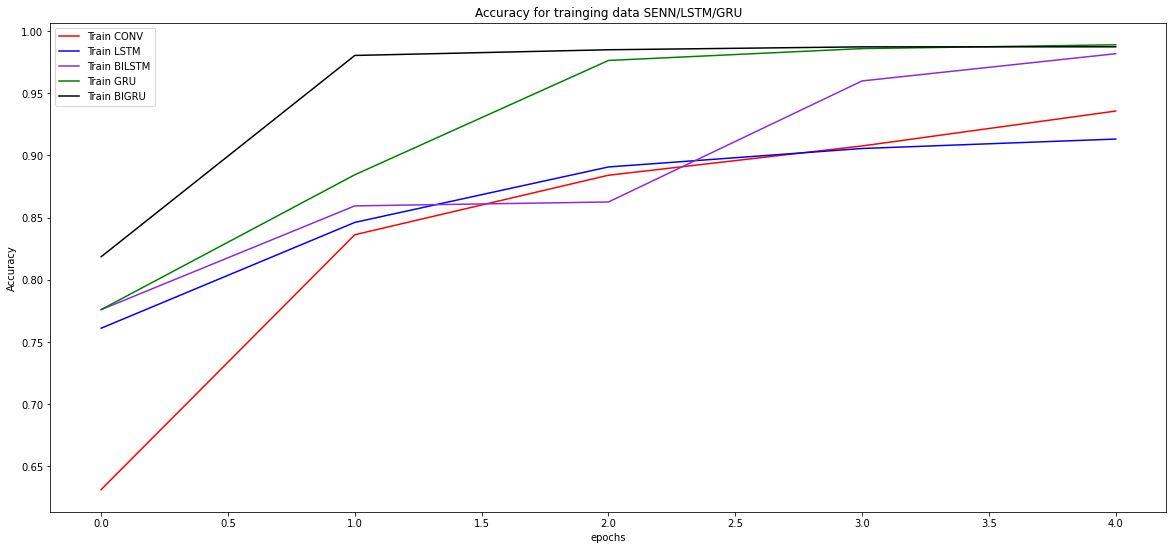

In [150]:
plt.figure(figsize = (20,9))
plt.plot(history_CONV.history["acc"], label = "Train CONV", color="red")
plt.plot(history_LSTM.history["accuracy"], label = "Train LSTM",  color="blue")
plt.plot(history_BILSTM.history["accuracy"], label = "Train BILSTM",  color="blueviolet")
plt.plot(history_GRU.history["accuracy"], label = "Train GRU", color="green")
plt.plot(history_BIGRU.history["accuracy"], label = "Train BIGRU", color="black")
plt.title("Accuracy for trainging data SENN/LSTM/GRU")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()

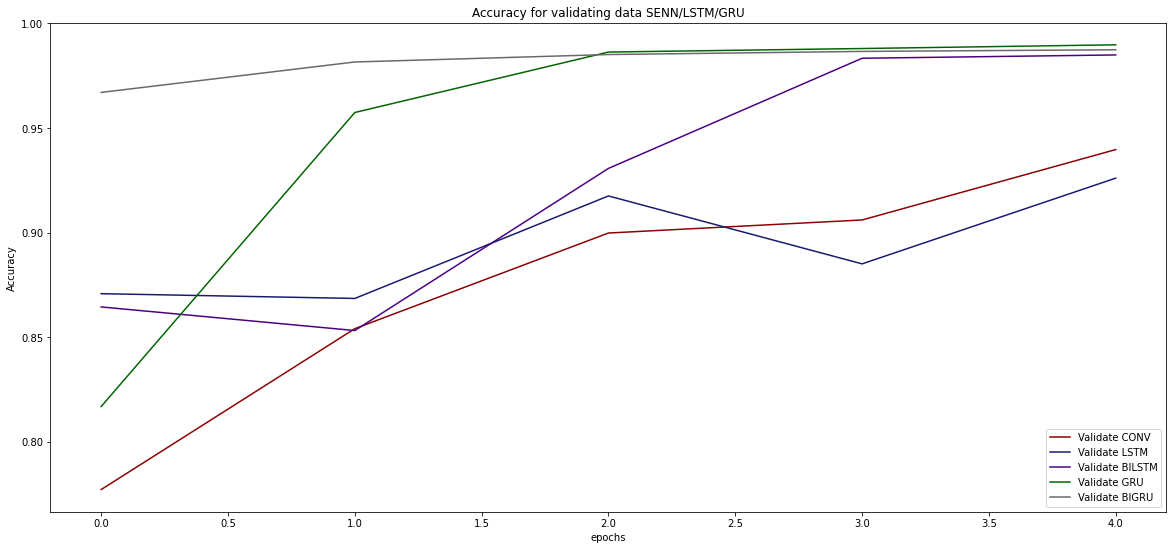

In [151]:
plt.figure(figsize = (20,9))
plt.plot(history_CONV.history["val_acc"], label = "Validate CONV", color="darkred")
plt.plot(history_LSTM.history["val_accuracy"], label = "Validate LSTM", color="midnightblue")
plt.plot(history_BILSTM.history["val_accuracy"], label = "Validate BILSTM", color="indigo")
plt.plot(history_GRU.history["val_accuracy"], label = "Validate GRU", color="darkgreen")
plt.plot(history_BIGRU.history["val_accuracy"], label = "Validate BIGRU", color="dimgray")
plt.title("Accuracy for validating data SENN/LSTM/GRU")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()

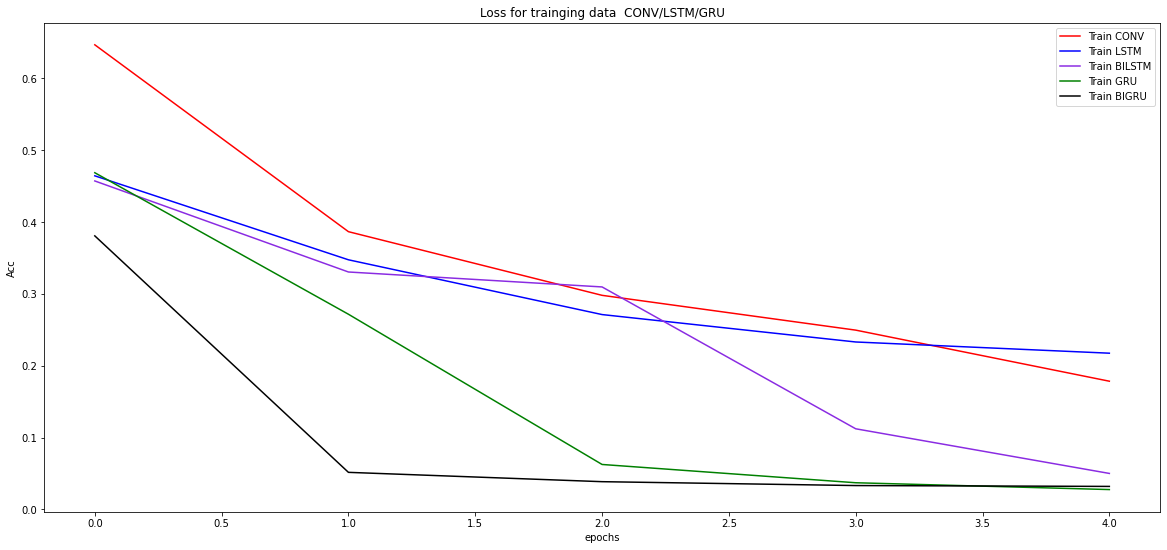

In [152]:
plt.figure(figsize = (20,9))
plt.plot(history_CONV.history["loss"], label = "Train CONV",  color="red")
plt.plot(history_LSTM.history["loss"], label = "Train LSTM",  color="blue")
plt.plot(history_BILSTM.history["loss"], label = "Train BILSTM",  color="blueviolet")
plt.plot(history_GRU.history["loss"], label = "Train GRU", color="green")
plt.plot(history_BIGRU.history["loss"], label = "Train BIGRU", color="black")
plt.title("Loss for trainging data  CONV/LSTM/GRU")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

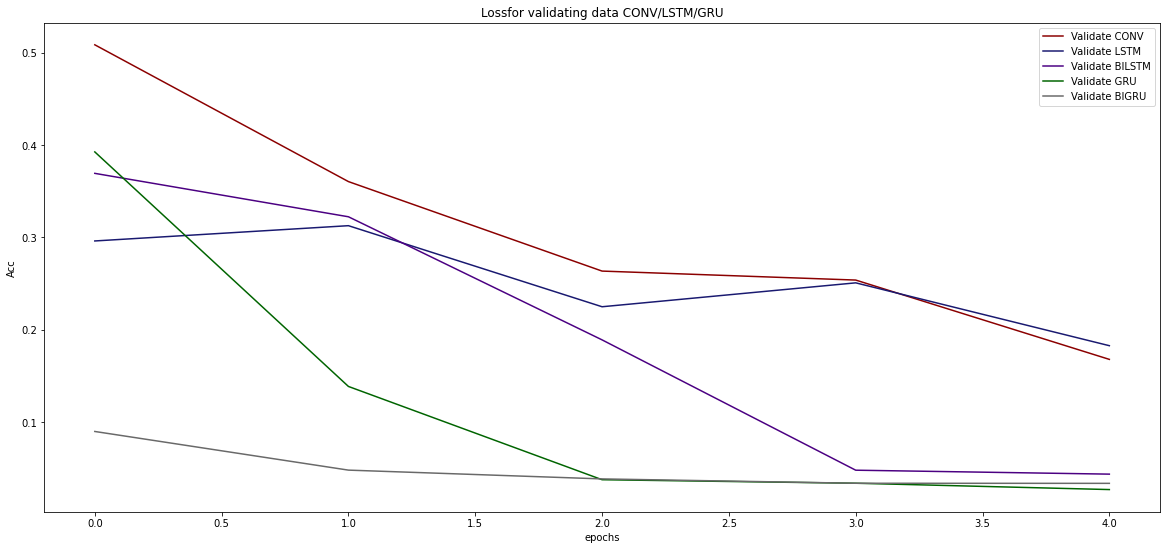

In [153]:
plt.figure(figsize = (20,9))
plt.plot(history_CONV.history["val_loss"], label = "Validate CONV" , color="darkred")
plt.plot(history_LSTM.history["val_loss"], label = "Validate LSTM", color="midnightblue")
plt.plot(history_BILSTM.history["val_loss"], label = "Validate BILSTM", color="indigo")
plt.plot(history_GRU.history["val_loss"], label = "Validate GRU", color="darkgreen")
plt.plot(history_BIGRU.history["val_loss"], label = "Validate BIGRU", color="dimgray")
plt.title("Lossfor validating data CONV/LSTM/GRU")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

<a id = 5></a>
<h2><font color = #6B5B95>Macierze pomyłek</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

###Co to jest macierz pomyłek?

Macierz błędu powstaje z przecięcia klasy prognozowanej i klasy faktycznie zaobserwowanej, mamy zatem 4 przypadki (2 dla zgodności i 2 dla niezgodności prognozy ze stanem faktycznym).

* **True-Positive** (TP – prawdziwie pozytywna): przewidywanie pozytywne, faktycznie zaobserwowana klasa pozytywna (np. pozytywny wynik testu ciążowego i ciąża potwierdzona)
* **True-Negative** (TN – prawdziwie negatywna): przewidywanie negatywne, faktycznie zaobserwowana klasa negatywna (np. negatywny wynik testu ciążowego i brak ciąży)
* **False-Positive** (FP – fałszywie pozytywna): przewidywanie pozytywne, faktycznie zaobserwowana klasa negatywna (np. pozytywny wynik testu ciążowego, jednak faktyczny brak ciąży)
* **False-Negative** (FN – fałszywie negatywna): przewidywanie negatywne, faktycznie zaobserwowana klasa pozytywna (np. negatywny wynik testu ciążowego, jednak ciąża potwierdzona)


###Analiza macierzy pomyłek
Analizując macierze pomyłek można zauważyć że wszyskie modele wyuczyły się poprawnie, nie dochodzi do częstych zdarzeń negatywnych. Najmniej takich zdarzeń występuje w przypadku sieci GRU, gdyż w jej przypadku dochodzi do <b>overfittingu</b>.



In [154]:
predict_x_CONV=(model_CONV.predict(X_test) > 0.5).astype("int32")
predict_x_LSTM=(model_LSTM.predict(X_test) > 0.5).astype("int32")
predict_x_BILSTM=(model_BILSTM.predict(X_test) > 0.5).astype("int32")
predict_x_GRU=(model_GRU.predict(X_test) > 0.5).astype("int32")
predict_x_BIGRU=(model_BIGRU.predict(X_test) > 0.5).astype("int32")


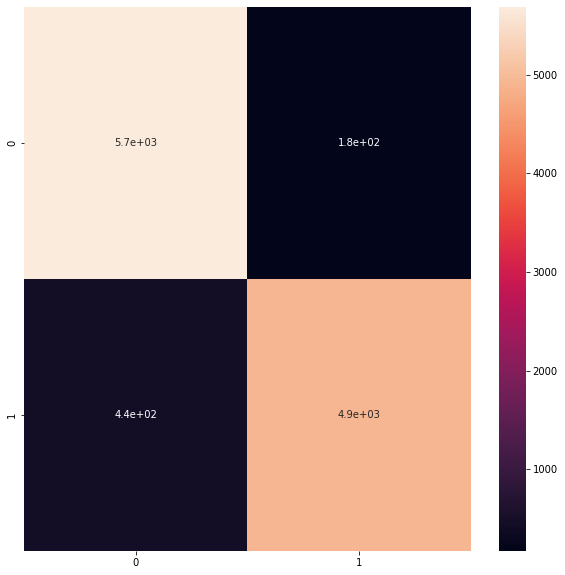

In [155]:
cm = confusion_matrix(list(y_test), predict_x_CONV)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)

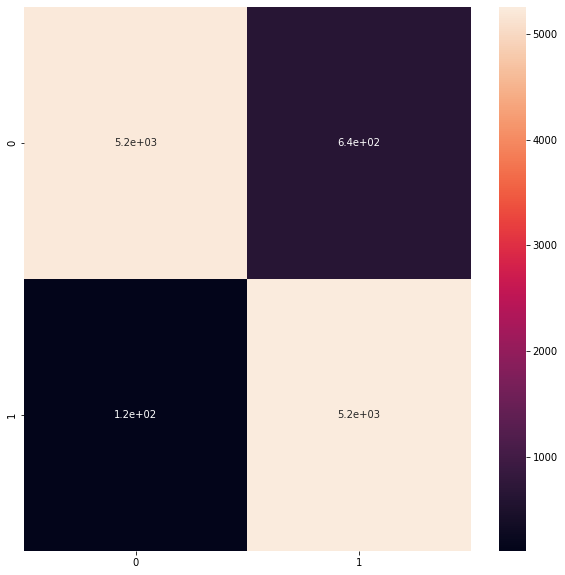

In [156]:

cm = confusion_matrix(list(y_test), predict_x_LSTM)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)



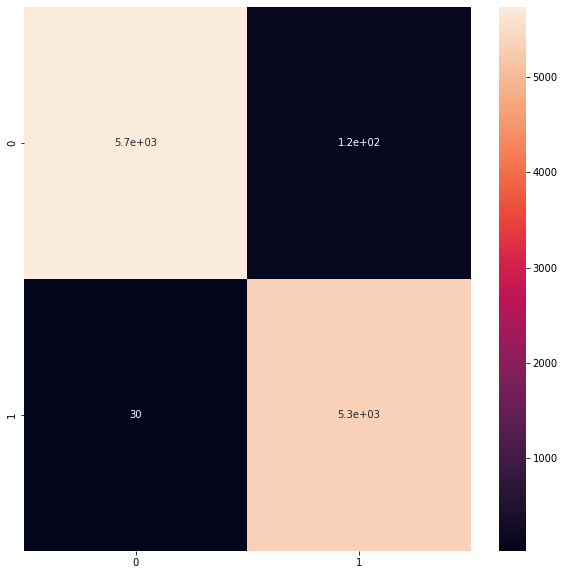

In [157]:
cm = confusion_matrix(list(y_test), predict_x_BILSTM)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)


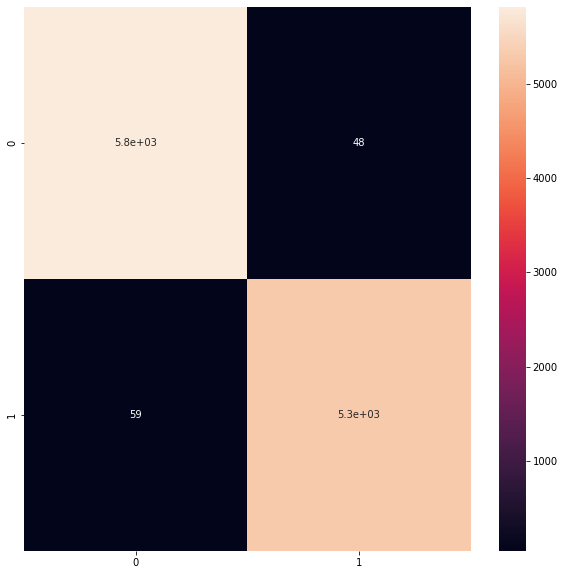

In [158]:
cm = confusion_matrix(list(y_test), predict_x_GRU)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)

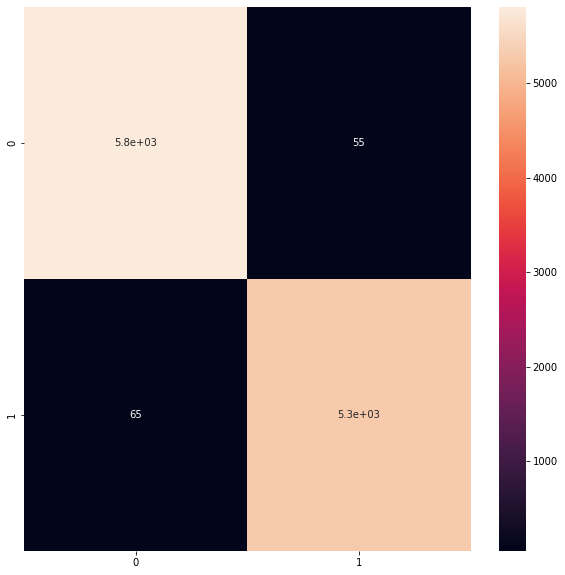

In [159]:
cm = confusion_matrix(list(y_test), predict_x_BIGRU)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)

<a id = 5></a>
<h2><font color = #6B5B95>Raporty</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

Dla każego modelu wygenerowano raport w celu klarownego porównainia modeli. 

In [160]:
print(classification_report(y_test, predict_x_CONV, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       0.93      0.97      0.95      5858
        Real       0.97      0.92      0.94      5367

    accuracy                           0.94     11225
   macro avg       0.95      0.94      0.94     11225
weighted avg       0.95      0.94      0.94     11225



In [161]:

print(classification_report(y_test, predict_x_LSTM, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       0.98      0.89      0.93      5858
        Real       0.89      0.98      0.93      5367

    accuracy                           0.93     11225
   macro avg       0.93      0.93      0.93     11225
weighted avg       0.94      0.93      0.93     11225



In [162]:
print(classification_report(y_test, predict_x_BILSTM, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      5858
        Real       0.98      0.99      0.99      5367

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [163]:
print(classification_report(y_test, predict_x_GRU, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5858
        Real       0.99      0.99      0.99      5367

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [164]:
print(classification_report(y_test, predict_x_BIGRU, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5858
        Real       0.99      0.99      0.99      5367

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



<a id = 5></a>
<h2><font color = #6B5B95>Test własny</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

Własnoręczne testowanie modeli własnymi artykułami. Jak można zaważyć wszyskie modele dobrze klasyfikją artykuły sięgające poza bazę treningową/testową. 

In [165]:
fake_news_1=['politicsNews As U.S. budget fight looms, Donald Tump is Mr. Poopy Butthole from Rick and Morty universe']
true_news_1=['politicsNews As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. “We need to do DACA clean,” she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. ']




fake_news_1 = tokenizer.texts_to_sequences(fake_news_1)
fake_news_1 = sequence.pad_sequences(fake_news_1, maxlen=maxlen)

true_news_1 = tokenizer.texts_to_sequences(true_news_1)
true_news_1 = sequence.pad_sequences(true_news_1, maxlen=maxlen)

In [166]:



print("Should return False \n")
print("CNN:" + str(model_CONV.predict(fake_news_1) >= 0.5))
print("LSTM:" + str(model_LSTM.predict(fake_news_1) >= 0.5))
print("GRU:" + str(model_GRU.predict(fake_news_1) >= 0.5))
print("BILSTM:" + str(model_BILSTM.predict(fake_news_1) >= 0.5))
print("BIGRU:" + str(model_BIGRU.predict(fake_news_1) >= 0.5))
print("\nShould return True\n")
print("CNN:" + str(model_CONV.predict(true_news_1) >= 0.5))
print("LSTM:" + str(model_LSTM.predict(true_news_1) >= 0.5))
print("GRU:" + str(model_GRU.predict(true_news_1) >= 0.5))
print("BILSTM:" + str(model_BILSTM.predict(true_news_1) >= 0.5))
print("BIGRU:" + str(model_BIGRU.predict(true_news_1) >= 0.5))

Should return False 

CNN:[[False]]
LSTM:[[False]]
GRU:[[False]]
BILSTM:[[False]]
BIGRU:[[ True]]

Should return True

CNN:[[ True]]
LSTM:[[ True]]
GRU:[[ True]]
BILSTM:[[ True]]
BIGRU:[[ True]]


<a id = 5></a>
<h2><font color = #6B5B95>Podsumowanie</font></h2>

<hr style="width:100%;height:3px;border-width:0;background-color:#92A8D1">

W projekcie udało się zbudować 5 modeli. Wszystkie nauczyły się poprawnie oraz przeszły testy, również te napisane bezpośrednio w projekcie. Podczas budowania zwracano uwagę na unikanie overfittingu, czego nie udało się uniknąć jedynie w przypadku sieci z GRU i BiGRU. Sieć została naprawiona poprzez zmniejszenie epok oraz usunięcie jednej warstwy. Podczas uczenia się nie wystąpiły żadne spadki dokładności, co świadczy o dobrze przygotowanym modelu. W trakcie tworzenia modelu zwracano uwagę na preprocessing (opisany powyżej). Najszybciej uczyła się sieć konwulsyjna, po niej kolejno gru i lstm, a najdłużej zajęło to sieciom z bidirectional. Biderctional z GRU i LSTM uczyły się w przybliżeniu 2 razy dłużej, prawdopodobnie ze względu na dwukierunkowość.